# Preprocessing

In [148]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import utils

## Reading Data

In [149]:
FILE_PATH = "data/balance_sheets_quarterly.csv"
df = pd.read_csv(FILE_PATH)

df.head()

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,cashAndCashEquivalents,shortTermInvestments,...,totalEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt,link,finalLink,marketCap
0,2024-03-31,PKP.WA,PLN,0,2024-03-31,2024-03-29 20:00:00,2024,Q1,176600000.0,0.0,...,3.064900e+09,8.250300e+09,0.0,8.250300e+09,51500000.0,2.895400e+09,2.718800e+09,NaN,NaN,2.929004e+10
1,2023-12-31,PKP.WA,PLN,0,2023-12-31,2023-12-30 19:00:00,2023,Q4,226200000.0,-10100000.0,...,3.202500e+09,8.320000e+09,0.0,8.320000e+09,42700000.0,2.893800e+09,2.667600e+09,NaN,NaN,3.264899e+10
2,2023-09-30,PKP.WA,PLN,0,2023-09-30,2023-09-29 20:00:00,2023,Q3,216800000.0,-16900000.0,...,3.286400e+09,8.290200e+09,0.0,8.290200e+09,41100000.0,2.653000e+09,2.436200e+09,NaN,NaN,3.296250e+10
3,2023-06-30,PKP.WA,PLN,0,2023-06-30,2023-06-29 20:00:00,2023,Q2,174600000.0,-16900000.0,...,3.303200e+09,8.107900e+09,0.0,8.107900e+09,40500000.0,2.650400e+09,2.475800e+09,NaN,NaN,3.842639e+10
4,2023-03-31,PKP.WA,PLN,0,2023-03-31,2023-03-30 20:00:00,2023,Q1,230300000.0,-16300000.0,...,3.357600e+09,8.048000e+09,0.0,8.048000e+09,42700000.0,2.675800e+09,2.445500e+09,NaN,NaN,3.585119e+10


In [150]:
len(df.columns)

55

## Dropping Unnecessary Data

### Drop rows where the reported currency is different from PLN

In [151]:
df = df[df["reportedCurrency"] == "PLN"]

### Drop columns that are completely useless for your analysis

In [152]:
columns_to_drop = [
    "reportedCurrency",
    "cik",
    "fillingDate",
    "acceptedDate",
    "calendarYear",
    "finalLink",
    "link",
    "period",
]

existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(columns=existing_columns_to_drop)

df.head()

,date,symbol,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,...,othertotalStockholdersEquity,totalStockholdersEquity,totalEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt,marketCap
0,2024-03-31,PKP.WA,176600000.0,0.0,176600000.0,639500000.0,189800000.0,121300000.0,1.127200e+09,6.803700e+09,...,0.0,3.064900e+09,3.064900e+09,8.250300e+09,0.0,8.250300e+09,51500000.0,2.895400e+09,2.718800e+09,2.929004e+10
1,2023-12-31,PKP.WA,226200000.0,-10100000.0,226200000.0,716800000.0,200200000.0,146200000.0,1.289400e+09,6.734100e+09,...,0.0,3.202500e+09,3.202500e+09,8.320000e+09,0.0,8.320000e+09,42700000.0,2.893800e+09,2.667600e+09,3.264899e+10
2,2023-09-30,PKP.WA,216800000.0,-16900000.0,216800000.0,712700000.0,224200000.0,141900000.0,1.295600e+09,6.698500e+09,...,0.0,3.286400e+09,3.286400e+09,8.290200e+09,0.0,8.290200e+09,41100000.0,2.653000e+09,2.436200e+09,3.296250e+10
3,2023-06-30,PKP.WA,174600000.0,-16900000.0,174600000.0,679700000.0,217600000.0,140900000.0,1.212800e+09,6.605600e+09,...,0.0,3.303200e+09,3.303200e+09,8.107900e+09,0.0,8.107900e+09,40500000.0,2.650400e+09,2.475800e+09,3.842639e+10
4,2023-03-31,PKP.WA,230300000.0,-16300000.0,230300000.0,802600000.0,219700000.0,143100000.0,1.395700e+09,6.367400e+09,...,0.0,3.357600e+09,3.357600e+09,8.048000e+09,0.0,8.048000e+09,42700000.0,2.675800e+09,2.445500e+09,3.585119e+10


### Drop companies that have less than 2 years of data (8 quarters)

In [153]:
print("Companies before dropping:", len(df["symbol"].unique()))

min_quarters = 8
df = df.groupby('symbol').filter(lambda x: len(x) >= min_quarters)

print("Companies after dropping:", len(df["symbol"].unique()))

Companies before dropping: 396
Companies after dropping: 390


### Drop rows with missing values in the market cap column

In [154]:
print("Rows before dropping:", len(df), "Companies:", len(df["symbol"].unique()))

df = df.dropna(subset=["marketCap"])

print("Rows after dropping:", len(df), "Companies:", len(df["symbol"].unique()))

Rows before dropping: 18080 Companies: 390
Rows after dropping: 16905 Companies: 375


In [155]:
df.columns[df.isnull().any()].tolist() # There are no other missing values

[]

### Drop redundant columns that combined data from other columns

In [156]:
columns_to_drop = [
    "cashAndShortTermInvestments",
    "goodwillAndIntangibleAssets",
    "totalLiabilitiesAndStockholdersEquity",
    "totalLiabilitiesAndTotalEquity",
]

df = df.drop(columns=columns_to_drop)

## Removing very correlated features


Correlation Matrix:


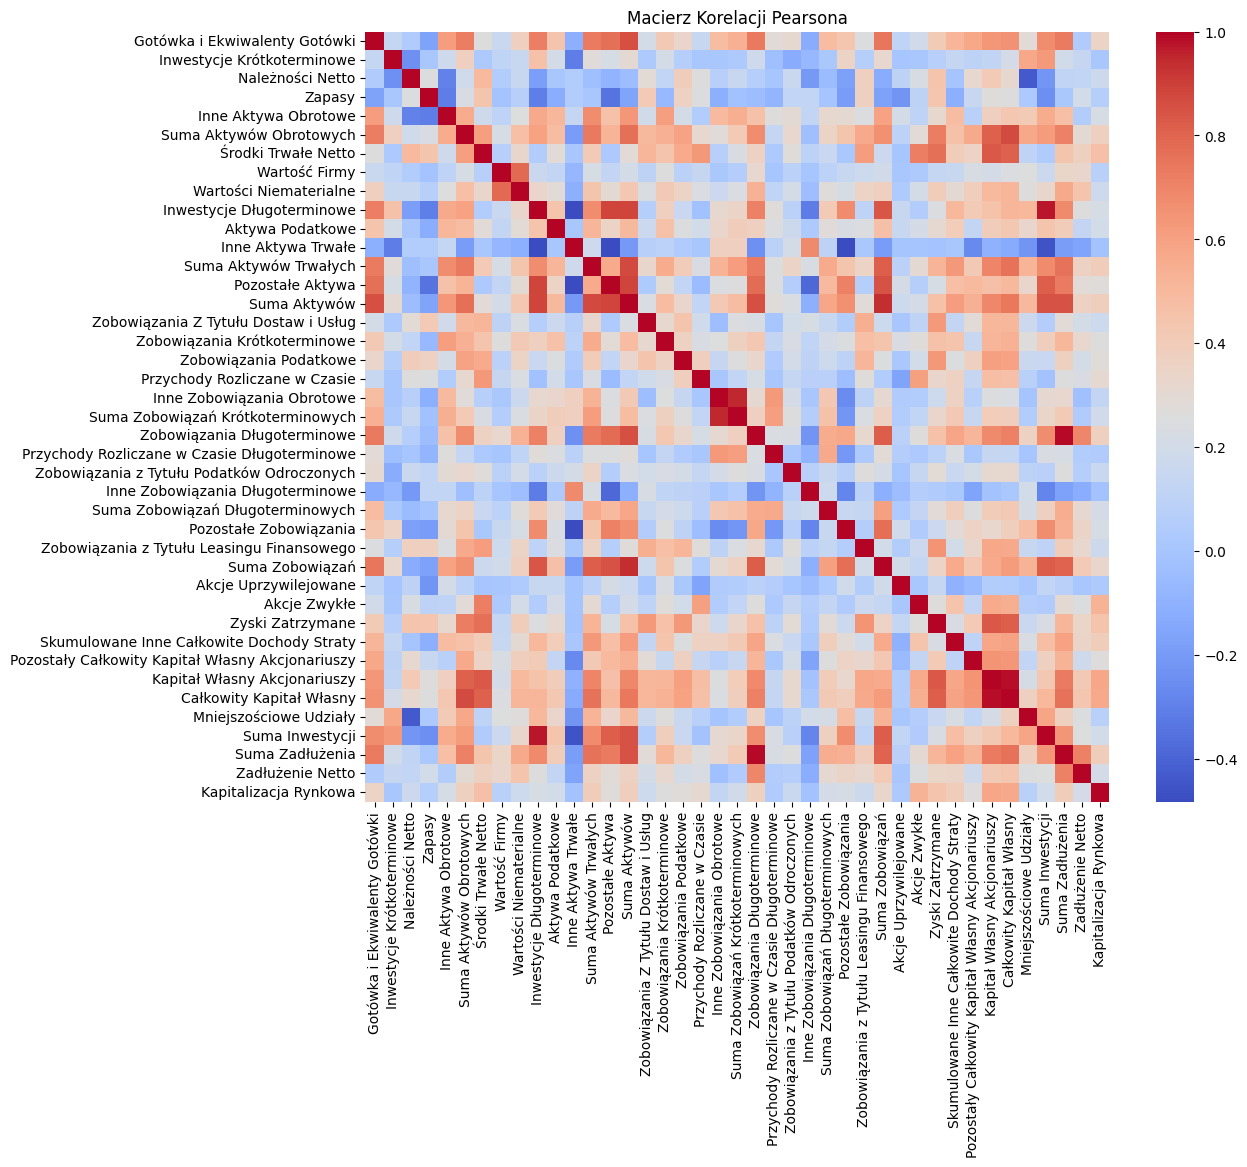

In [157]:
df_numeric = df.drop(columns=["symbol", "date"])

print("\nCorrelation Matrix:")
corr_matrix = df_numeric.corr(method="pearson")

corr_matrix_translated = corr_matrix.rename(
    columns=utils.translate_column, index=utils.translate_column
)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_translated, annot=False, cmap="coolwarm")
plt.title("Macierz Korelacji Pearsona")
plt.show()

### Dropping features with too high correlation

In [158]:
high_corr_threshold = 0.95

# Identify columns with high correlation (ignoring the diagonal)
high_corr_pairs = set()
for i in range(len(corr_matrix_translated.columns)):
    for j in range(i):
        if abs(corr_matrix_translated.iloc[i, j]) >= high_corr_threshold:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            high_corr_pairs.add((colname_i, colname_j))

high_corr_pairs

{('totalCurrentLiabilities', 'otherCurrentLiabilities'),
 ('totalDebt', 'longTermDebt'),
 ('totalEquity', 'totalStockholdersEquity'),
 ('totalInvestments', 'longTermInvestments')}

I decided to drop these features from pairs:

- otherCurrentLiabilities
- longTermDebt
- totalEquity
- totalInvestments

In [159]:
columns_to_drop = [
    "otherCurrentLiabilities",  # Keep totalCurrentLiabilities
    "longTermDebt",  # Keep totalDebt
    "totalEquity",  # Keep totalStockholdersEquity
    "totalInvestments",  # Keep longTermInvestments
]

df = df.drop(columns=columns_to_drop)
df_numeric = df.drop(columns=["symbol", "date"])

## Dropping least important features

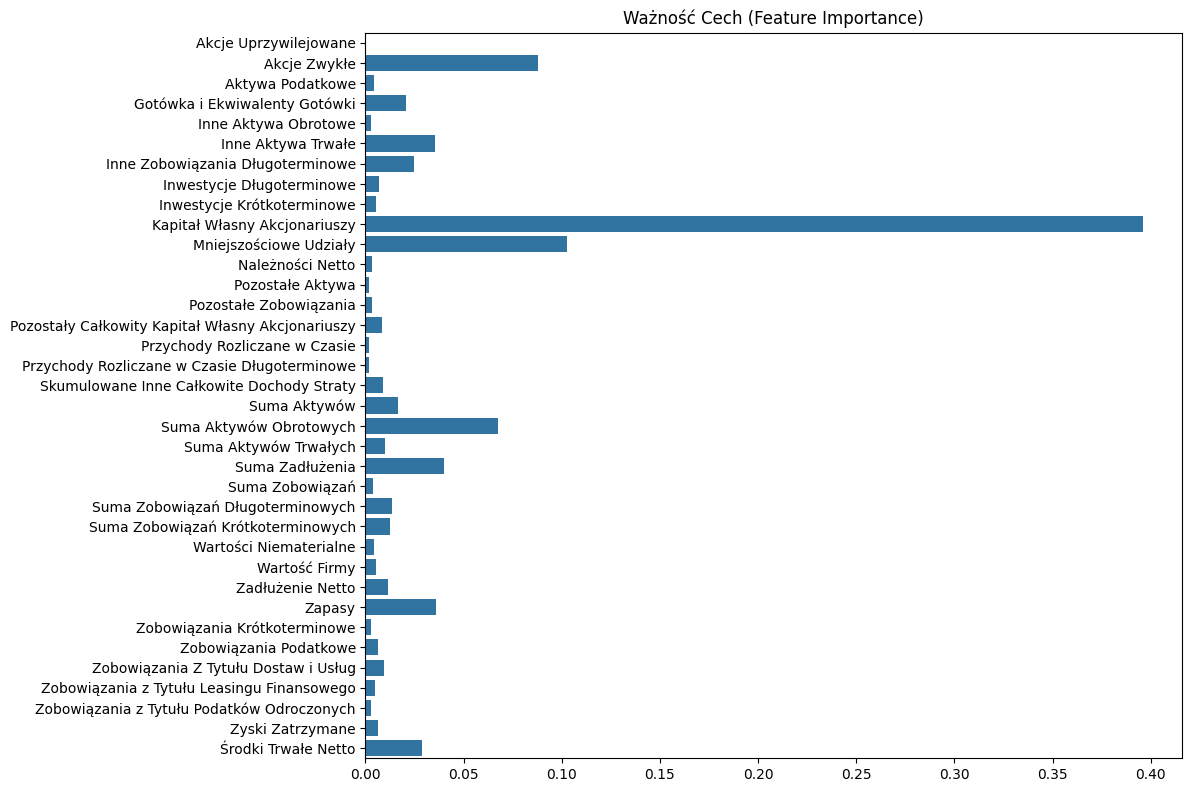

In [160]:
X = df_numeric.drop(columns=["marketCap"])
y = df["marketCap"]

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

importances = model.feature_importances_

feature_names_translated = [utils.translate_column(name) for name in X.columns]

features_and_importances = sorted(
    zip(feature_names_translated, importances), key=lambda x: x[0]
)

sorted_feature_names = [feature for feature, _ in features_and_importances]
sorted_importances = [importance for _, importance in features_and_importances]

plt.figure(figsize=(12, 8))

sns.barplot(x=sorted_importances, y=sorted_feature_names)

plt.title("Ważność Cech (Feature Importance)")

plt.tight_layout(pad=1.0)  # Adds a little padding around the plot
plt.show()

In [161]:
importance_threshold = 0.005

dropped_features = [
    name
    for importance, name in zip(importances, X.columns)
    if importance < importance_threshold
]

print("Dropped features due to low importance:")
translations = [utils.translate_column(name) for name in dropped_features]
for name, translation in sorted(zip(dropped_features, translations), key=lambda x: x[1]):
    print(f"{translation} ({name})")

Dropped features due to low importance:
Akcje Uprzywilejowane (preferredStock)
Aktywa Podatkowe (taxAssets)
Inne Aktywa Obrotowe (otherCurrentAssets)
Należności Netto (netReceivables)
Pozostałe Aktywa (otherAssets)
Pozostałe Zobowiązania (otherLiabilities)
Przychody Rozliczane w Czasie (deferredRevenue)
Przychody Rozliczane w Czasie Długoterminowe (deferredRevenueNonCurrent)
Suma Zobowiązań (totalLiabilities)
Wartości Niematerialne (intangibleAssets)
Zobowiązania Krótkoterminowe (shortTermDebt)
Zobowiązania z Tytułu Leasingu Finansowego (capitalLeaseObligations)
Zobowiązania z Tytułu Podatków Odroczonych (deferredTaxLiabilitiesNonCurrent)


In [162]:
df_updated = df.drop(columns=dropped_features)

print(f"Original dataset shape: {df.shape}")
print(f"Updated dataset shape after dropping features: {df_updated.shape}")

Original dataset shape: (16905, 39)
Updated dataset shape after dropping features: (16905, 26)


In [163]:
df = df_updated
df

,date,symbol,cashAndCashEquivalents,shortTermInvestments,inventory,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,longTermInvestments,otherNonCurrentAssets,...,totalNonCurrentLiabilities,commonStock,retainedEarnings,accumulatedOtherComprehensiveIncomeLoss,othertotalStockholdersEquity,totalStockholdersEquity,minorityInterest,totalDebt,netDebt,marketCap
0,2024-03-31,PKP.WA,176600000.0,0.0,189800000.0,1.127200e+09,6.803700e+09,0.0,51500000.0,49300000.0,...,2.770700e+09,2.239300e+09,49500000.0,776100000.0,0.0,3.064900e+09,0.0,2.895400e+09,2.718800e+09,2.929004e+10
1,2023-12-31,PKP.WA,226200000.0,-10100000.0,200200000.0,1.289400e+09,6.734100e+09,0.0,52800000.0,105200000.0,...,2.784200e+09,2.239300e+09,167600000.0,795600000.0,0.0,3.202500e+09,0.0,2.893800e+09,2.667600e+09,3.264899e+10
2,2023-09-30,PKP.WA,216800000.0,-16900000.0,224200000.0,1.295600e+09,6.698500e+09,0.0,58000000.0,104600000.0,...,2.576200e+09,2.239300e+09,188600000.0,858500000.0,0.0,3.286400e+09,0.0,2.653000e+09,2.436200e+09,3.296250e+10
3,2023-06-30,PKP.WA,174600000.0,-16900000.0,217600000.0,1.212800e+09,6.605600e+09,0.0,57400000.0,116200000.0,...,2.529400e+09,2.239300e+09,196400000.0,867500000.0,0.0,3.303200e+09,0.0,2.650400e+09,2.475800e+09,3.842639e+10
4,2023-03-31,PKP.WA,230300000.0,-16300000.0,219700000.0,1.395700e+09,6.367400e+09,0.0,59000000.0,123600000.0,...,2.550900e+09,2.239300e+09,308800000.0,809500000.0,0.0,3.357600e+09,0.0,2.675800e+09,2.445500e+09,3.585119e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20354,2018-12-31,R22.WA,13132000.0,-89000.0,242000.0,2.978200e+07,2.762500e+07,0.0,6015000.0,25000.0,...,9.489200e+07,2.840000e+05,87954000.0,0.0,-79000.0,8.815900e+07,13898000.0,8.021400e+07,6.708200e+07,4.231600e+06
20355,2018-09-30,R22.WA,13648000.0,0.0,0.0,2.833900e+07,2.461100e+07,0.0,66000.0,90000.0,...,6.612800e+07,2.840000e+05,97343000.0,0.0,0.0,9.762700e+07,11165000.0,6.387400e+07,5.022600e+07,5.112000e+06
20356,2018-06-30,R22.WA,15797000.0,0.0,0.0,3.192800e+07,2.451200e+07,79554000.0,59000.0,100000.0,...,6.774700e+07,2.840000e+05,94599000.0,0.0,0.0,9.488300e+07,10211000.0,6.643600e+07,5.063900e+07,5.452800e+06
20357,2018-03-31,R22.WA,17283000.0,0.0,0.0,3.469200e+07,2.241500e+07,0.0,0.0,328000.0,...,4.849600e+07,2.840000e+05,92393000.0,0.0,0.0,9.267700e+07,9424000.0,4.597500e+07,2.869200e+07,5.566400e+06


## Preprocessing without outliers removal

### Scale data using StandardScaler 

In [164]:
df_numeric = df.drop(columns=["date", "symbol"])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)

df_scaled["date"] = df["date"]
df_scaled["symbol"] = df["symbol"]

### Save the current DataFrame to the CSV file

In [165]:
df_scaled.to_csv("data/balance_sheets_quarterly_processed.csv", index=False)

## Preprocessing with outliers removal

### Remove outliers using LOF algorithm

In [166]:
df_numerical = df.drop(columns=["symbol", "date"])

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

y_pred = lof.fit_predict(df_numerical)

df_cleaned = df[y_pred == 1]

In [167]:
print(f"Number of outliers: {df.shape[0] - df_cleaned.shape[0]}")

Number of outliers: 846


### Scale data using StandardScaler

In [168]:
df_numeric = df_cleaned.drop(columns=["date", "symbol"])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)

df_scaled["date"] = df_cleaned["date"]
df_scaled["symbol"] = df_cleaned["symbol"]

### Save the DataFrames without outliers

In [169]:
df_scaled.to_csv("data/balance_sheets_quarterly_no_outliers.csv", index=False)